## Lesson 1: Preprocessing Data

**Excercise 1: Creating dummy variables**
    
Being able to include categorical features in the model building process can enhance performance as they may add information that contributes to prediction accuracy.

The `music_df` dataset has been preloaded for you, and its shape is printed. Also, pandas has been imported as `pd`.

Now you will create a new `DataFrame` containing the original columns of `music_df` plus dummy variables from the "genre" column.

- Use a relevant function, passing the entire music_df DataFrame, to create `music_dummies`, dropping the first binary column.
- Print the shape of `music_dummies`.

In [1]:
import pandas as pd
import numpy as np

music_df = pd.read_csv('data/music_clean.csv', index_col = 0)
genre = ['Jazz', 'Rap', 'Electronic', 'Rock', 'Alternative', 'Classical','Blues', 'Anime', 'Country', 'Hip-Hop']
music_df['genre'] = np.random.choice(genre, size=len(music_df))
print(music_df.shape)
music_df.head()

(1000, 12)


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
36506,60.0,0.896000,0.726,214547.0,0.177,0.000002,0.1160,-14.824,0.0353,92.934,0.618,Country
37591,63.0,0.003840,0.635,190448.0,0.908,0.083400,0.2390,-4.795,0.0563,110.012,0.637,Country
37658,59.0,0.000075,0.352,456320.0,0.956,0.020300,0.1250,-3.634,0.1490,122.897,0.228,Rap
36060,54.0,0.945000,0.488,352280.0,0.326,0.015700,0.1190,-12.020,0.0328,106.063,0.323,Blues
35710,55.0,0.245000,0.667,273693.0,0.647,0.000297,0.0633,-7.787,0.0487,143.995,0.300,Alternative


In [2]:
# Create music_dummies
music_dummies = pd.get_dummies(music_df, drop_first=True)

# Print the new DataFrame's shape
print("Shape of music_dummies: {}".format(music_dummies.shape))

Shape of music_dummies: (1000, 20)


In [3]:
music_dummies.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre_Anime,genre_Blues,genre_Classical,genre_Country,genre_Electronic,genre_Hip-Hop,genre_Jazz,genre_Rap,genre_Rock
36506,60.0,0.896000,0.726,214547.0,0.177,0.000002,0.1160,-14.824,0.0353,92.934,0.618,False,False,False,True,False,False,False,False,False
37591,63.0,0.003840,0.635,190448.0,0.908,0.083400,0.2390,-4.795,0.0563,110.012,0.637,False,False,False,True,False,False,False,False,False
37658,59.0,0.000075,0.352,456320.0,0.956,0.020300,0.1250,-3.634,0.1490,122.897,0.228,False,False,False,False,False,False,False,True,False
36060,54.0,0.945000,0.488,352280.0,0.326,0.015700,0.1190,-12.020,0.0328,106.063,0.323,False,True,False,False,False,False,False,False,False
35710,55.0,0.245000,0.667,273693.0,0.647,0.000297,0.0633,-7.787,0.0487,143.995,0.300,False,False,False,False,False,False,False,False,False


**Exercise 2: Regression with categorical features**

Now you have created music_dummies, containing binary features for each song's genre, it's time to build a ridge regression model to predict song popularity.

`music_dummies` has been preloaded for you, along with `Ridge`, `cross_val_score`, `numpy` as `np`, and a `KFold` object stored as `kf`.

The model will be evaluated by calculating the average `RMSE`, but first, you will need to convert the scores for each fold to positive values and take their square root. This metric shows the average error of our model's predictions, so it can be compared against the standard deviation of the target value—"popularity".

- Create X, containing all features in music_dummies, and y, consisting of the "popularity" column, respectively.
- Instantiate a ridge regression model, setting alpha equal to 0.2.
- Perform cross-validation on X and y using the ridge model, setting cv equal to kf, and using negative mean squared error as the scoring metric.
- Print the `RMSE` values by converting negative scores to positive and taking the square root.

In [4]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 0.2)
kf = KFold(n_splits=2)

# Create X and y
X = music_dummies.drop(["popularity"], axis = 1).values
y = music_dummies["popularity"].values 

# Perform cross-validation
scores = cross_val_score(ridge, X, y, cv=kf, scoring="neg_mean_squared_error")

# Calculate RMSE
rmse = np.sqrt(-scores)  # RMSE needs the square root of the scores
print("Average RMSE: {}".format(np.mean(rmse)))
print("Standard Deviation of the target array: {}".format(np.std(y)))

Average RMSE: 19.215440660552634
Standard Deviation of the target array: 14.02156909907019


## Lesson 2: Handeling missing data

**Exercise 1: Dropping missing data**

Over the next three exercises, you are going to tidy the music_df dataset. You will create a pipeline to impute missing values and build a KNN classifier model, then use it to predict whether a song is of the "Rock" genre.

In this exercise specifically, you will drop missing values accounting for less than 5% of the dataset, and convert the "genre" column into a binary feature.

- Print the number of missing values for each column in the music_df dataset, sorted in ascending order.
- Remove values for all columns with 50 or fewer missing values.

In [5]:
# Inject NaN with 15% probability 
def inject_nan(df, prob=0.15):
  mask = np.random.choice([True, False], size=df.shape, p=[prob, 1-prob]) 
  return df.where(~mask, np.nan) # Replace with NaN where mask is True

music_df = pd.read_csv('data/music_clean.csv', index_col = 0)
genre = ['Jazz', 'Rap', 'Electronic', 'Rock', 'Alternative', 'Classical','Blues', 'Anime', 'Country', 'Hip-Hop']
music_df['genre'] = np.random.choice(genre, size=len(music_df))
music_df = inject_nan(music_df.copy())  # Operate on a copy
music_df.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
36506,NaN,NaN,0.726,214547.0,0.177,0.000002,NaN,-14.824,0.0353,92.934,0.618,Electronic
37591,NaN,0.00384,0.635,190448.0,0.908,0.083400,0.2390,-4.795,0.0563,NaN,0.637,Hip-Hop
37658,59.0,NaN,0.352,456320.0,0.956,NaN,0.1250,-3.634,NaN,122.897,0.228,Rock
36060,54.0,NaN,0.488,352280.0,NaN,0.015700,0.1190,-12.020,NaN,NaN,0.323,Rock
35710,55.0,NaN,0.667,273693.0,0.647,0.000297,0.0633,-7.787,0.0487,143.995,0.300,Rap


In [6]:
# Print missing values for each column
music_df.isna().sum().sort_values()

popularity          125
loudness            125
energy              145
liveness            146
duration_ms         149
speechiness         149
valence             149
danceability        151
instrumentalness    152
acousticness        153
tempo               153
genre               162
dtype: int64

In [7]:
# Print missing values for each column
print(music_df.isna().sum().sort_values())

# Remove values where less than 5% are missing
music_df = music_df.dropna(subset=["genre", "popularity", "loudness", "liveness", "tempo"])

# Convert genre to a binary feature
music_df["genre"] = np.where(music_df["genre"] == "Rock", 1, 0)

print(music_df.isna().sum().sort_values())
print("Shape of the `music_df`: {}".format(music_df.shape))

popularity          125
loudness            125
energy              145
liveness            146
duration_ms         149
speechiness         149
valence             149
danceability        151
instrumentalness    152
acousticness        153
tempo               153
genre               162
dtype: int64
popularity           0
loudness             0
liveness             0
tempo                0
genre                0
duration_ms         53
valence             60
acousticness        69
danceability        70
instrumentalness    72
energy              74
speechiness         77
dtype: int64
Shape of the `music_df`: (454, 12)


**Exercise 2: Pipeline for song genre prediction: Part I**

Now it's time to build a pipeline. It will contain steps to impute missing values using the mean for each feature and build a KNN model for the classification of song genre.

The modified music_df dataset that you created in the previous exercise has been preloaded for you, along with KNeighborsClassifier and train_test_split.

- Import SimpleImputer and Pipeline.
- Instantiate an imputer.
- Instantiate a KNN classifier with three neighbors.
- Create steps, a list of tuples containing the imputer variable you created, called "imputer", followed by the knn model you created, called "knn".

In [23]:
# Import modules
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

# Instantiate an imputer
imputer = SimpleImputer(strategy= 'mean')

# Instantiate a knn model
knn = KNeighborsClassifier(n_neighbors = 3)

# Build steps for the pipeline
steps = [("imputer", imputer), 
         ("knn", knn)]

**Exercise 2: Pipeline for song genre prediction: Part II**

Having set up the steps of the pipeline in the previous exercise, you will now use it on the music_df dataset to classify the genre of songs. What makes pipelines so incredibly useful is the simple interface that they provide.

X_train, X_test, y_train, and y_test have been preloaded for you, and confusion_matrix has been imported from sklearn.metrics.

- Create a pipeline using the steps you previously defined.
- Fit the pipeline to the training data.
- Make predictions on the test set.
- Calculate and print the confusion matrix.



In [24]:
import pandas as pd
import numpy as np

def inject_nan(df, prob_range=(0.1, 0.2), excepted_cols=[]):
    """Injects NaN values randomly into a DataFrame.

    Args:
        df (pd.DataFrame): The DataFrame to modify.
        prob_range (tuple, optional): A tuple of (min_prob, max_prob) 
                                      specifying the range of probabilities. 
                                      Defaults to (0.1, 0.2).
        excepted_cols (list, optional): A list of column names to exclude 
                                        from NaN injection. Defaults to [].
    Returns:
        pd.DataFrame: A new DataFrame with injected NaN values.
    """

    df = df.copy()  # Operate on a copy

    for col in df.columns:
        if col not in excepted_cols:
            prob = np.random.uniform(prob_range[0], prob_range[1])
            mask = np.random.choice([True, False], size=len(df), p=[prob, 1-prob])
            df.loc[mask, col] = np.nan

    return df

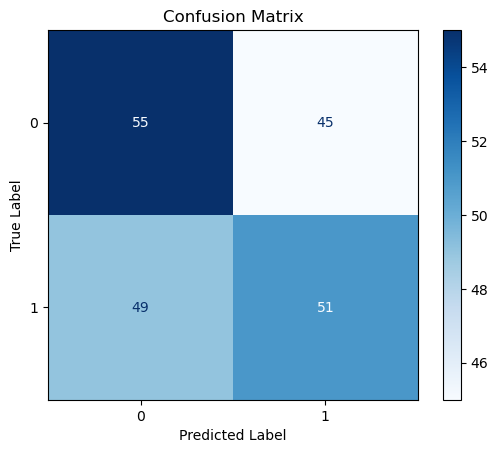

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

music_df = pd.read_csv('data/music_clean.csv', index_col = 0)
music_df = inject_nan(music_df.copy(), prob_range = (0.0, 0.15), excepted_cols=['genre'])

X = music_df.drop(['genre'], axis = 1).values
y = music_df['genre'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create the pipeline
pipeline = Pipeline(steps)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Customization for the display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=pipeline.classes_)

# Plot the matrix
disp.plot(cmap='Blues')  # Choose a colormap of your liking

# Set labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Lesson 2: entering and Scaling

**Exercise 1: Centering and scaling for regression**

Now you have seen the benefits of scaling your data, you will use a pipeline to preprocess the music_df features and build a lasso regression model to predict a song's loudness.

`X_train`, `X_test`, `y_train`, and `y_test` have been created from the music_df dataset, where the target is "loudness" and the features are all other columns in the dataset. Lasso and Pipeline have also been imported for you.

Note that "genre" has been converted to a binary feature where 1 indicates a rock song, and 0 represents other genres.

- Import StandardScaler.
- Create the steps for the pipeline object, a `StandardScaler` object called "scaler", and a lasso model called "lasso" with alpha set to 0.5.
- Instantiate a pipeline with steps to scale and build a lasso regression model.
- Calculate the `R-squared` value on the test data.

In [31]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

music_df = pd.read_csv('data/music_clean.csv', index_col = 0)

X = music_df.drop(['genre'], axis = 1).values
y = music_df['genre'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Create pipeline steps
steps = [("scaler", StandardScaler()),
         ("lasso", Lasso(alpha=0.5))]

# Instantiate the pipeline
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

# Calculate and print R-squared
print(pipeline.score(X_test, y_test))

0.0


## **Exercise 2: Centering and scaling for classification**

Now you will bring together scaling and model building into a pipeline for cross-validation.

Your task is to build a pipeline to scale features in the music_df dataset and perform grid search cross-validation using a logistic regression model with different values for the hyperparameter C. The target variable here is "genre", which contains binary values for rock as 1 and any other genre as 0.

`StandardScaler`, `LogisticRegression`, and `GridSearchCV` have all been imported for you.

- Build the steps for the pipeline: a `StandardScaler()` object named "scaler", and a logistic regression model named "logreg".
- Create the parameters, searching 20 equally spaced float values ranging from 0.001 to 1.0 for the logistic regression model's C hyperparameter within the pipeline.
- Instantiate the grid search object.
- Fit the grid search object to the training data.

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Build the steps
steps = [("scaler", StandardScaler()),
         ("logreg", LogisticRegression())]
pipeline = Pipeline(steps)

# Create the parameter space
parameters = {"logreg__C": np.linspace(0.001, 1.0, 20)}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=21)

# Instantiate the grid search object
cv = GridSearchCV(pipeline, param_grid=parameters)

# Fit to the training data
cv.fit(X_train, y_train)
print(cv.best_score_, "\n", cv.best_params_)

0.8625 
 {'logreg__C': 0.15873684210526315}


## Lesson 4: Evaluating multiple models

**Exercise 1: Visualizing regression model performance**
    
Now you have seen how to evaluate multiple models out of the box, you will build three regression models to predict a song's "energy" levels.

The music_df dataset has had dummy variables for "genre" added. Also, feature and target arrays have been created, and these have been split into `X_train`, `X_test`, `y_train`, and `y_test`.

The following have been imported for you: `LinearRegression`, `Ridge`, `Lasso`, `cross_val_score`, and `KFold`.

- Write a for loop using model as the iterator, and `model.values()` as the iterable.
- Perform cross-validation on the training features and the training target array using the model, setting cv equal to the KFold object.
- Append the model's cross-validation scores to the results list.
- Create a box plot displaying the results, with the x-axis labels as the names of the models.

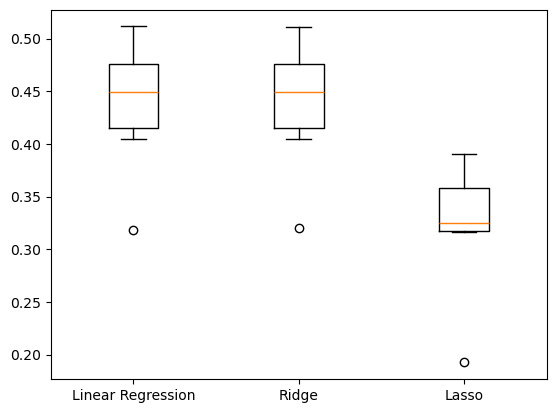

In [37]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score, KFold

models = {"Linear Regression": LinearRegression(), "Ridge": Ridge(alpha=0.1), "Lasso": Lasso(alpha=0.1)}
results = []

# Loop through the models' values
for model in models.values():
  kf = KFold(n_splits=6, random_state=42, shuffle=True)
  
  # Perform cross-validation
  cv_scores = cross_val_score(model, X_train, y_train, cv=kf)
  
  # Append the results
  results.append(cv_scores)

# Create a box plot of the results
plt.boxplot(results, labels=models.keys())
plt.show()

**Exercise 2: Predicting on the test set**

In the last exercise, linear regression and ridge appeared to produce similar results. It would be appropriate to select either of those models; however, you can check predictive performance on the test set to see if either one can outperform the other.

You will use root mean squared error (RMSE) as the metric. The dictionary models, containing the names and instances of the two models, has been preloaded for you along with the training and target arrays X_train_scaled, X_test_scaled, y_train, and y_test.

- Import mean_squared_error.
- Fit the model to the scaled training features and the training labels.
- Make predictions using the scaled test features.
- Calculate RMSE by passing the test set labels and the predicted labels.

In [42]:
import pandas as pd
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  # Import StandardScaler


music_df = pd.read_csv('data/music_clean.csv', index_col = 0)

X = music_df.drop(['genre'], axis = 1).values
y = music_df['genre'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create a scaler for feature scaling 
scaler = StandardScaler() 

# Fit and transform training data 
X_train_scaled = scaler.fit_transform(X_train) 

# Transform testing data (using the fitted scaler)
X_test_scaled = scaler.transform(X_test)  

for name, model in models.items():
  
  # Fit the model to the training data
  model.fit(X_train_scaled, y_train)
  
  # Make predictions on the test set
  y_pred = model.predict(X_test_scaled)
  
  # Calculate the test_rmse
  test_rmse = root_mean_squared_error(y_test, y_pred)
  print("{} Test Set RMSE: {}".format(name, test_rmse))

Linear Regression Test Set RMSE: 0.36280193586539794
Ridge Test Set RMSE: 0.3628036091175636
Lasso Test Set RMSE: 0.4024898638931842


**Exercise 3: Pipeline for predicting song popularity**

For the final exercise, you will build a pipeline to impute missing values, scale features, and perform hyperparameter tuning of a logistic regression model. The aim is to find the best parameters and accuracy when predicting song genre!

All the models and objects required to build the pipeline have been preloaded for you.

- Create the steps for the pipeline by calling a simple imputer, a standard scaler, and a logistic regression model.
- Create a pipeline object, and pass the steps variable.
- Instantiate a grid search object to perform cross-validation using the pipeline and the parameters.
- Print the best parameters and compute and print the test set accuracy score for the grid search object.